Task 1 : Prediction using Supervised ML


Data Science and Business Analytics Intern

GRIP April'21


Predict the percentage of an student based on the no. of study hours 

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
df =pd.read_csv('task1 .csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


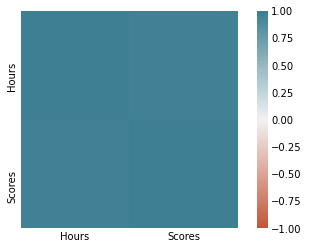

In [ ]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

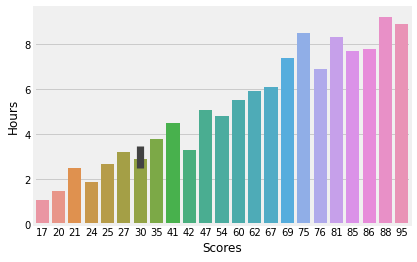

In [ ]:
sns.barplot(x='Scores',y='Hours', data=df)

In [ ]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
y_train

array([25, 42, 47, 35, 20, 27, 41, 95, 75, 30, 30, 24, 54, 67, 86, 60, 85,
       17, 69, 88])

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Score')

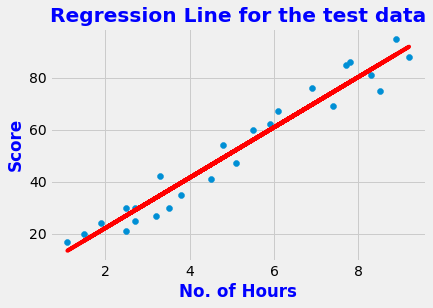

In [ ]:
from matplotlib import style
style.use('fivethirtyeight')
txt = {'weight':'bold', 'color' : 'blue'}
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color ='red');
plt.title('Regression Line for the test data', fontdict = txt)
plt.xlabel('No. of Hours', fontdict = txt)
plt.ylabel('Score', fontdict = txt)

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("r2_score: ",score)
print("Traing Score: ",regressor.score(X_train, y_train))
print("Testing Score: ",regressor.score(X_train, y_train))

r2_score:  0.9678055545167994
Traing Score:  0.9491209376364417
Testing Score:  0.9491209376364417


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean_absolute_error :",mean_absolute_error(y_test,y_pred))
print("Mean_squared_error :", mean_squared_error(y_test,y_pred))
print("Root_Mean_Squared_Error:", np.sqrt(mean_absolute_error(y_test, y_pred)))

Mean_absolute_error : 3.9207511902099244
Mean_squared_error : 18.943211722315272
Root_Mean_Squared_Error: 1.9800886824104431


In [ ]:
hours = 9.25
# predicting the value using regressor
self_prediction = regressor.predict(np.array([hours]).reshape(-1,1))
print("Number of Hours ={} \nPredicted Score ={}".format(hours,self_prediction[0]))

Number of Hours =9.25 
Predicted Score =92.38611528261494


**Conclusion : If a Student studies for 9.25 hours, A student would get nearby 92 scores.**




